# Matplotlib Styles: FiveThirtyEight Case Study

Matplotlib has pre-defined styles, and in this exercise we will use fivethrityeight to build a graph. To do that, we import the matplotlib.style submodule and then use the style.use() function. Note that we must use the style.use() function before we create the graph — before calling the plt.plot() function.

After we call style.use(style's name eg: 'Solarize_Light2'), all subsequent graphs will inherit this style. To get back to the default settings, we need to use style.use('default').

We're going to use a dataset on wine quality. Researchers P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. collected this data for their research paper. We can find documentation and download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_corr = red_wine.corr()['quality'][:-1]
print(red_corr)
print('-------------------------------------------------')

white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_corr = white_wine.corr()['quality'][:-1]
print(white_corr)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64
-------------------------------------------------
fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64


Red wine quality most strongly correlates with alcohol level and volatile acidity, and white wine quality most strongly correlates with alcohol level and density. Let's represent the correlation values visually in the form of two bar plots.

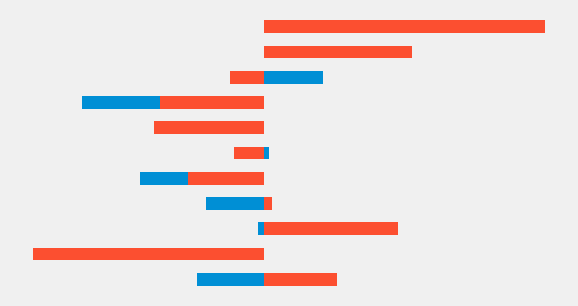

In [8]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(white_corr.index, white_corr, height=0.5)
ax.barh(red_corr.index, red_corr, height=0.5)
ax.grid(visible=None)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

We can tell from the two colors that Matplotlib built two different bar plots. It's not clear which is which, though.

To separate them, we're going to move the white wine plot to the right side of the graph. To do that, we can use the left parameter of the Axes.barh() method.

This parameter moves the left sides of the bars from their default x-coordinate of 0. In our case, left=2 moves them from 0 to 2 (for bars representing negative quantities, the right sides move from 0 to 2).

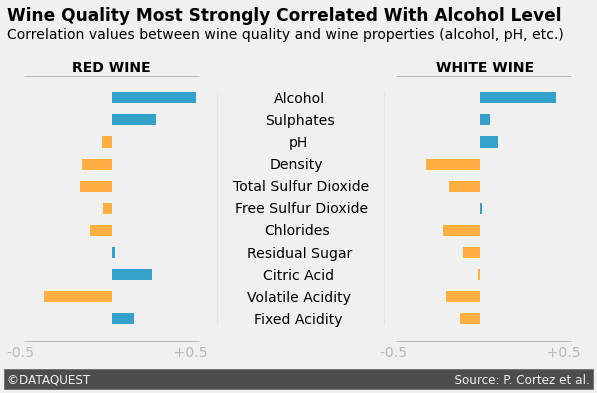

In [14]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))

positive_white = white_corr >= 0
color_map_white = positive_white.map({True:'#33A1C9', False:'#ffae42'})
positive_red = red_corr >= 0
color_map_red = positive_red.map({True:'#33A1C9', False:'#ffae42'})

ax.barh(white_corr.index, white_corr, left=2, height=0.5,
        color=color_map_white)
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1, color=color_map_red)
ax.grid(visible=None)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.axvline(0.5, color='grey', alpha=0.1, linewidth=1, ymin=0.1, ymax=0.9)
ax.axvline(1.45, color='grey', alpha=0.1, linewidth=1, ymin=0.1, ymax=0.9)

x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8
for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)
ax.axhline(11, color='grey', linewidth=1, alpha=0.5, xmin=0.01, xmax=0.32)
ax.text(-0.33, 11.2, 'RED WINE', weight='bold')
ax.axhline(11, color='grey', linewidth=1, alpha=0.5, xmin=0.67, xmax=0.98)
ax.text(1.75, 11.2, 'WHITE WINE', weight='bold')

# signature
ax.text(-0.7, -2.9,
        '©DATAQUEST' + ' '*94 + 'Source: P. Cortez et al.',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=12)

# title and subtitle
ax.text(-0.7, 13.5, 'Wine Quality Most Strongly Correlated With Alcohol Level', size=17, weight='bold')
ax.text(-0.7, 12.7, 'Correlation values between wine quality and wine properties (alcohol, pH, etc.)')
plt.show()


    
plt.show()

**NOTE:** Since we erased the grid and the x- and y-tick labels, and reduced the width of the bars, we added y-tick labels in the center of the graph — both bar plots have the same y-tick labels. We added the labels using Axes.text() and specify the coordinates manually. This can be a bit cumbersome, but it also gives us the precision and flexibility we need.

To create more space between the labels and each bar plot, we moved the red wine bar plot a little to the left. We used left=-0.1 — this moves the x-coordinate of the left sides of the bars from 0 to -0.1.

To visually separate the labels from the bar plots, we added two vertical lines — one to the left of the labels column, and the other to the right

To add x-tick labels so the audience can read the correlation values, we added a horizontal line under each bar plot. Note that we control the position of the lines along the x-axis through the xmin and the xmax parameters. All correlations range between -0.5 and +0.5, and we used these two values as extremes. We added these values as x-tick labels under each horizontal line.

To add a title to each bar plot to show which is the plot for red wine and which is the other, we drew a horizontal line above each plot. Then we wrote "RED WINE" and "WHITE WINE" respectively above the horizontal lines.

To color our graphs based on positive and negative correlation values, we used the steps below:
- We calculate the correlations between quality and the other columns.
- We create a Boolean vector where zero and positive correlation values are mapped to True, and negative values are mapped to False.
- We map each Boolean value to a string representing a color code: True to '#33A1C9', and False to '#ffae42'.